# ARGO Winter Project: RadRoads

author: **Cheng Hou**

Coded in Python 3

---

In [1]:
#Importing necessary packages

import geopandas as gpd
import pandas as pd
import matplotlib.pylab as plt
import fiona
import osmnx as ox
import networkx as nx

%matplotlib inline

## Look at the Santa Monica

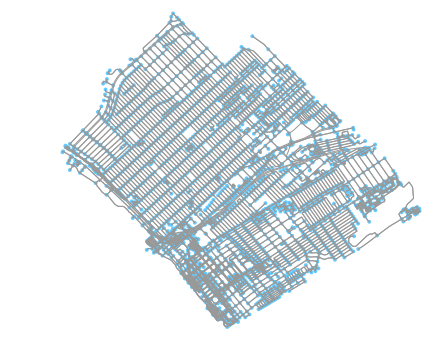

In [65]:
santa_monica = ox.graph_from_place('Santa monica, Los Angeles County, California', network_type='drive')
santa_monica_projected = ox.project_graph(santa_monica)
fig, ax = ox.plot_graph(Boulder_projected)

In [66]:
ox.save_graph_shapefile(santa_monica_projected, filename='santa_monica')

In [67]:
streets_sm = gpd.read_file('data/santa_monica/edges/edges.shp')
streets_sm.head()

,access,bridge,from,highway,key,lanes,length,maxspeed,name,oneway,osmid,ref,to,tunnel,geometry
0,,,122563735,secondary,0,4,28.537849853267467,30 mph,Pico Boulevard,False,386266279,,18166113,,LINESTRING (365614.3329384364 3766079.46317818...
1,,,123274652,residential,0,,366.9575585492882,25 mph,Urban Avenue,False,43964373,,18166113,,LINESTRING (365305.0700505949 3766011.71582489...
2,,,122563730,secondary,0,4,88.36850365083792,30 mph,Pico Boulevard,False,386266279,,18166113,,LINESTRING (365537.8100080304 3766035.13212819...
3,,,122563738,secondary,0,4,138.43750850439216,30 mph,Pico Boulevard,False,398239535,,18166116,,LINESTRING (365864.6235072651 3766217.25669435...
4,,,338460485,residential,0,,139.9871797132958,25 mph,9th Street,False,13390561,,122391204,,LINESTRING (362847.8695129512 3764915.02593463...


## Longest Road

In [68]:
streets_sm.length = streets_sm.length.astype('float')

In [81]:
dict_v = {'length': 'sum', 'highway': 'first', 'oneway': 'first'}
table = streets_sm.groupby('name').agg(dict_v).reset_index()
table.head()

,name,length,highway,oneway
0,,7334.349663,motorway_link,True
1,10th Street,4039.666639,residential,False
2,11th Street,5026.087124,residential,False
3,12th Street,3245.571919,residential,False
4,14th Street,4834.816553,residential,False


In [86]:
table.sort_values(by='length', ascending=False).head(10)

,name,length,highway,oneway
0,,7334.349663,motorway_link,True
113,Ocean Park Boulevard,6952.798968,tertiary,False
137,Santa Monica Freeway,6918.404530,motorway,True
115,Olympic Boulevard,6639.924964,primary,True
28,4th Street,6316.399381,secondary,False
57,Colorado Avenue,5317.802242,secondary,False
126,Pico Boulevard,5210.011001,secondary,False
2,11th Street,5026.087124,residential,False
7,17th Street,4981.460715,tertiary,False
4,14th Street,4834.816553,residential,False


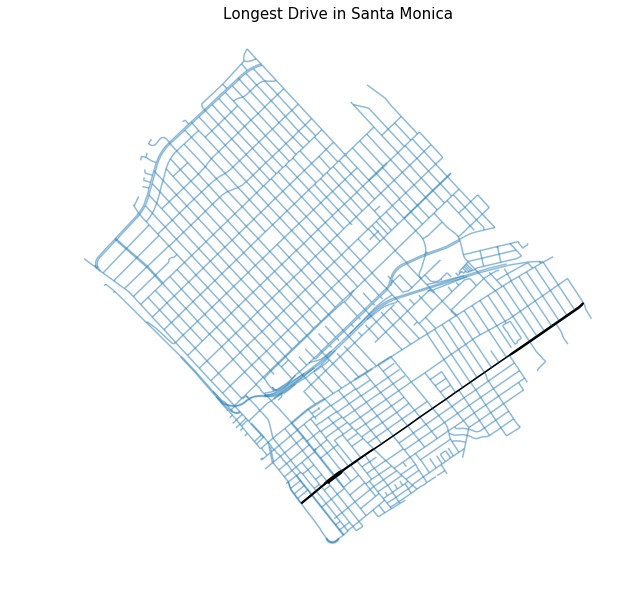

In [91]:
fig, ax = plt.subplots(figsize=(10,10))
streets_sm.plot(ax=ax, alpha=0.5)
streets_sm[streets_sm.name == 'Ocean Park Boulevard'].plot(ax=ax, color='black')
ax.set_title('Longest Drive in Santa Monica', fontsize=15)
ax.set_axis_off()

## Issues
Some street names contain more than two names. Some Streets have no name.
* How to identify and handle the data that may have errors?

* How to make sure that these roads are "one road"? Currently we only use names. 

In [88]:
streets_sm.name.unique()

array(['Pico Boulevard', 'Urban Avenue', '9th Street', 'Olympic Boulevard',
       '10th Street', 'Seaview Terrace', 'Appian Way', 'Ocean Avenue',
       'Ocean Park Boulevard', '18th Street', '', '20th Street',
       'Santa Monica Freeway', "['Hampton Drive', '2nd Street']",
       'Marine Place', 'Larkin Place', 'Olympic Drive', '4th Street',
       'Cloverfield Boulevard', 'Ocean Way',
       "['Pico Boulevard', 'Appian Way']", 'East Ocean Avenue',
       'Neilson Way', 'Main Street', '3rd Street', '6th Street',
       'Lincoln Boulevard', '11th Street', '12th Street', 'Euclid Street',
       '14th Street', '16th Street', '17th Street', '19th Street',
       '21st Street', '22nd Street', '24th Street', '25th Street',
       '26th Street', '27th Street', '28th Street', 'Stewart Street',
       'Yorkshire Avenue', '31st Street', '32nd Street', '33rd Street',
       '34th Street', 'Hollister Avenue', 'Beverly Avenue',
       "['Kensington Road', 'Beverly Avenue']", 'Barnard Way',
    

* What is the exact meaning of street type?

In [90]:
streets_sm.highway.value_counts()

residential                      1226
tertiary                          324
secondary                         233
primary                           117
motorway_link                      15
motorway                           12
trunk_link                          5
secondary_link                      4
unclassified                        3
['residential', 'tertiary']         2
trunk                               2
['unclassified', 'secondary']       1
Name: highway, dtype: int64

* How to make sure the query from the API give us what we want?

Currently we first search online and then use the keywords in ipython notebook.

In [94]:
help(ox.graph_from_place)

Help on function graph_from_place in module osmnx.core:

graph_from_place(query, network_type='all_private', simplify=True, retain_all=False, truncate_by_edge=False, name='unnamed', which_result=1, buffer_dist=None, timeout=180, memory=None, max_query_area_size=2500000000, clean_periphery=True, infrastructure='way["highway"]')
    Create a networkx graph from OSM data within the spatial boundaries of some
    geocodable place(s).
    
    The query must be geocodable and OSM must have polygon boundaries for the
    geocode result. If OSM does not have a polygon for this place, you can
    instead get its street network using the graph_from_address function, which
    geocodes the place name to a point and gets the network within some distance
    of that point. Alternatively, you might try to vary the which_result
    parameter to use a different geocode result. For example, the first geocode
    result (ie, the default) might resolve to a point geometry, but the second
    geocode res